# Dataset [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)


### import

In [ ]:
import pandas as pd
## Medical Cost Personal Datasets
url = "https://drive.google.com/file/d/1Tsz_1EeyX6VRclKUVCQ3n0tUNO1NdMUp/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
## Copia
df2 = df.filter(items=['age','sex','bmi','children','smoker','charges'])


### Limpeza

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [ ]:
df2['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: >

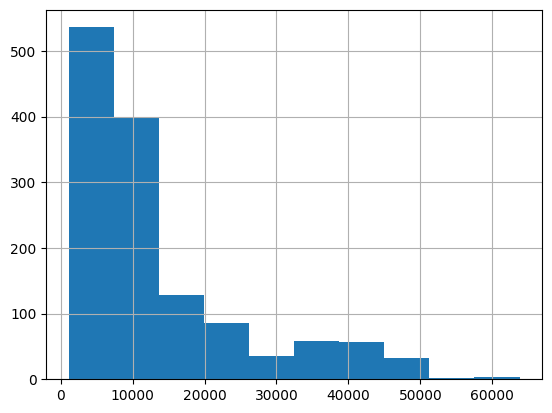

In [ ]:
df2['charges'].hist()

### Normalização

In [ ]:
## coluna sex com 0 = masculino e 1 para feminini
df2['sex'] = df2['sex'].replace({'male': 0, 'female': 1})

In [ ]:
## coluna Smoker com 0 = no e 1 = yes
df2['smoker'] = df2['smoker'].replace({'no': 0, 'yes': 1})

In [ ]:
df2

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [ ]:
## Normalizando coluna age
##define o desvio padrão de cada valor
#o ideal é aplicar em todo o dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array(df2['age']).reshape(-1,1) #transforma em um array
scaler = MinMaxScaler()
scaler.fit(X)
df2['age'] = scaler.transform(X).reshape(1,-1)[0]

In [ ]:
## Normalizando coluna bmi
##define o desvio padrão de cada valor
#o ideal é aplicar em todo o dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array(df2['bmi']).reshape(-1,1) #transforma em um array
scaler = MinMaxScaler()
scaler.fit(X)
df2['bmi'] = scaler.transform(X).reshape(1,-1)[0]

In [ ]:
## Normalizando coluna children
##define o desvio padrão de cada valor
#o ideal é aplicar em todo o dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array(df2['children']).reshape(-1,1) #transforma em um array
scaler = MinMaxScaler()
scaler.fit(X)
df2['children'] = scaler.transform(X).reshape(1,-1)[0]

In [ ]:
## Normalizando coluna charges
##define o desvio padrão de cada valor
#o ideal é aplicar em todo o dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array(df2['charges']).reshape(-1,1) #transforma em um array
scaler = MinMaxScaler()
scaler.fit(X)
df2['charges'] = scaler.transform(X).reshape(1,-1)[0]

In [ ]:
df2

,age,sex,bmi,children,smoker,charges
0,0.021739,1,0.321227,0.0,1,0.251611
1,0.000000,0,0.479150,0.2,0,0.009636
2,0.217391,0,0.458434,0.6,0,0.053115
3,0.326087,0,0.181464,0.0,0,0.333010
4,0.304348,0,0.347592,0.0,0,0.043816
...,...,...,...,...,...,...
1333,0.695652,0,0.403820,0.6,0,0.151299
1334,0.000000,1,0.429379,0.0,0,0.017305
1335,0.000000,1,0.562012,0.0,0,0.008108
1336,0.065217,1,0.264730,0.0,0,0.014144


## Regressão linear


In [ ]:
age = pd.DataFrame(df2['age'])
bmi = pd.DataFrame(df2['bmi'])
charges = df2['charges'] #variável alvo

### age

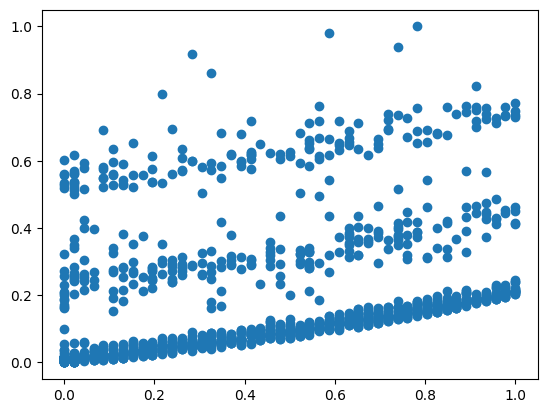

0.2990081933306476

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(age, charges)
plt.show()
df2.charges.corr(df2.age)

### bmi

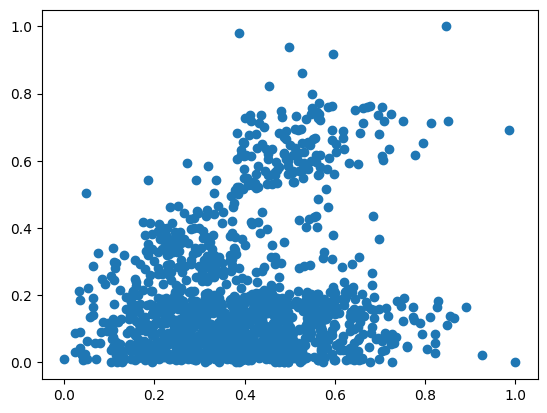

0.19834096883362892

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bmi, charges)
plt.show()
df2.charges.corr(df2.bmi)

In [ ]:
df2.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


### teste de variaveis

In [ ]:
#teste estatístico, verifica se a correlação é estatisticamente significativa
#hipotese nula = correlação entre as variáveis é estatisticamente igual a 0
#p-valor <= 0,05 (5%) rejeita a hipótese  nula
#p-valor > 0,05 aceita a hipótese nula

from scipy.stats import pearsonr
print('age - ',pearsonr(df2['age'],df2['charges']))
print('bmi - ',pearsonr(df2['bmi'],df2['charges']))


age -  PearsonRResult(statistic=0.29900819333064765, pvalue=4.886693331718192e-29)
bmi -  PearsonRResult(statistic=0.19834096883362887, pvalue=2.459085535116766e-13)


## Treinamento

In [ ]:
x = df2.drop(['charges','children','smoker','sex'], axis = 1)
custo = df2['charges'] #variável alvo

In [ ]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()

In [ ]:
rl.fit(x, custo)

LinearRegression()

In [ ]:
## intercepion
rl.intercept_

0.03387465791549435

In [ ]:
rl.coef_

array([0.17763883, 0.19755145])

In [ ]:
# Coeficientes do modelo
for feature, coef in zip(df2.columns.tolist(), rl.coef_.tolist()):
    print(f"{feature}: {round(coef, 4)}")

age: 0.1776
sex: 0.1976


In [ ]:
print('Função gerada = Y = {} + {}*age + {}*bmi'.format(round(rl.intercept_,2), round(rl.coef_[0],2), round(rl.coef_[1],2)))

Função gerada = Y = 0.03 + 0.18*age + 0.2*bmi


In [ ]:
rl.score(x,custo)

0.11718338606939949

### predição valores

In [ ]:
previsao = rl.predict([[150,50]])
print(previsao.round(2))

[36.56]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

valores = rl.predict(x)

print(f"MSE de Teste: {mean_squared_error(custo, valores):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(custo, valores):1.1f}")

MSE de Teste: 0.0
MAE de Teste: 0.1


### valores multiplos

In [ ]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(x, custo)
rl.intercept_
for feature, coef in zip(df2.columns.tolist(), rl.coef_.tolist()):
    print(f"{feature}: {round(coef, 4)}")
print('R2 - ',rl.score(x,custo))

from sklearn.metrics import mean_absolute_error, mean_squared_error

valores = rl.predict(x)

print(f"MSE de Teste: {mean_squared_error(custo, valores):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(custo, valores):1.1f}")

age: 0.1776
sex: 0.1976
R2 -  0.11718338606939949
MSE de Teste: 0.0
MAE de Teste: 0.1
